In [2]:
# Load required librairies.
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline 
#allows plots to be printed withouth plt.show() command

# Display n rows from pandas outputs

pd.options.display.max_rows = 4000

# pip install --upgrade matplotlib

In [ ]:
#Summarize Rentals data set.
print(rentals.head())
print(rentals.info())
print(rentals.describe())
print(rentals.columns)
print(rentals.index)

In [4]:
# Load rental data.
rentals = pd.io.parsers.read_csv('zillow_sales.csv', dtype={'RegionName': 'str'})
rentals = rentals[["RegionName", "2021-06"]]

In [5]:
# Load sales data
sales = pd.io.parsers.read_csv('zillow_rentals.csv', dtype={'RegionName': 'str'})
sales = sales[["RegionName", "State", "City", "Metro", "CountyName","2021-06-30"]]

In [6]:
# Load income data
# Income Tax by zipcode from IRS, located - https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2018-zip-code-data-soi
# "zipcode" is the zipcode, column "N1" is the number of returns and A00100 is adjusted gross income, A02650 is total income, and A00200 is salaries and wages.
income = pd.io.parsers.read_csv('18zpallagi.csv', dtype={'zipcode': 'str'})

In [7]:
# Process income data for joining
income = income[["zipcode","N1","A00100","A02650","A00200"]]
income = income.groupby("zipcode").sum()
income["gincome"] = income["A00100"]/income["N1"]*1000
income["tincome"] = income["A02650"]/income["N1"]*1000
income["salwag"] = income["A00200"]/income["N1"]*1000
income["RegionName"] = income.index
income = income[["gincome","tincome","salwag","RegionName"]]

In [8]:
income.head()

,gincome,tincome,salwag,RegionName
zipcode,,,,
00000,77535.155370,78440.133780,51757.294184,00000
01001,60019.209660,60637.541164,43988.144896,01001
01002,93048.264984,94723.659306,50736.803365,01002
01005,62206.250000,62930.000000,47959.583333,01005
01007,79230.779055,80235.376756,57007.407407,01007


In [9]:
# Merge Rentals and Sales Tables
dataset = pd.merge(sales, rentals, how="inner", on="RegionName")

In [10]:
# Merge Income with main dataset
dataset = pd.merge(dataset, income, how="inner", on="RegionName")

In [11]:
#Rename columsn for main dataset
dataset.columns = ('zip','state','city','metro','county','sale','rent','gross','total','wage')

In [12]:
# Add column for rent to sales ratio
dataset["rs"] = dataset["rent"] / dataset["sale"]

In [13]:
# Add column for income to rent ratio
dataset["ir"] = dataset["gross"] / dataset["rent"]

In [14]:
# Add column for income to rent ratio
dataset["ir"] = dataset["gross"] / dataset["rent"]

In [132]:
# Export to csv for a geo chart
geo_d = dataset.groupby(by='state').mean().reset_index()
geo_d.to_csv('geo_d.csv',index=False)

(10.0, 60.0)

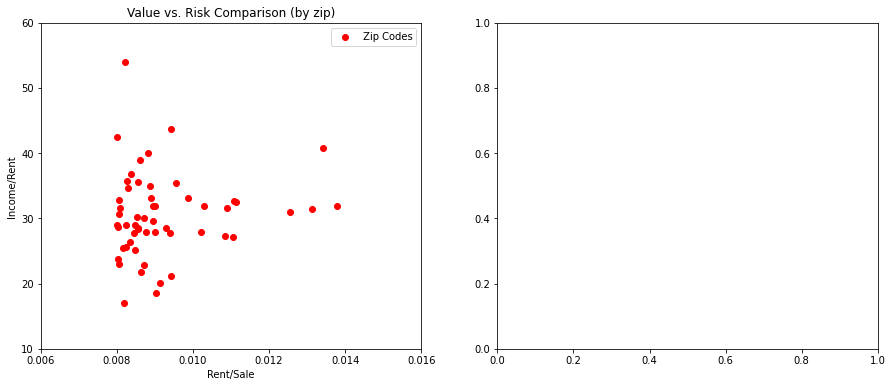

In [67]:
# Create a scatter plot of the sales and rentals data
fig1_d = dataset[dataset['rs'] > 0.008].sort_values(by='ir', ascending=False)
x = fig1_d['rs']
y = fig1_d['ir']

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

# fig1 = plt.figure()
axes[0].scatter(x,y,label="Zip Codes",color="red",lw=1)
axes[0].set_xlabel('Rent/Sale')
axes[0].set_ylabel('Income/Rent')
axes[0].set_title('Value vs. Risk Comparison (by zip)')
axes[0].legend(loc=0)
axes[0].set_xlim([0.006,0.016])
axes[0].set_ylim([10,60])

In [122]:
#Import Seaborn
import seaborn as sns

%matplotlib inline

In [69]:
tips = sns.load_dataset('tips')

In [72]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill'>

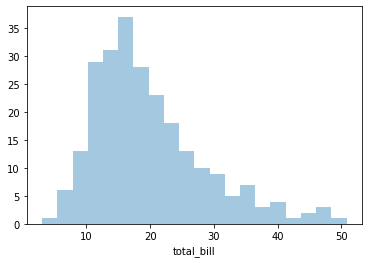

In [82]:
sns.distplot(tips['total_bill'],kde=False,bins=20)

<AxesSubplot:xlabel='rs'>

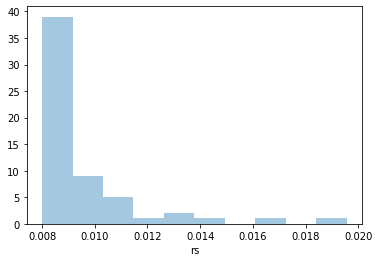

In [80]:
sns.distplot(fig1_d['rs'],kde=False,bins=10)

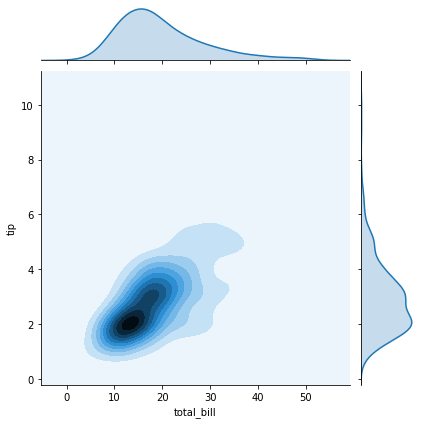

In [88]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

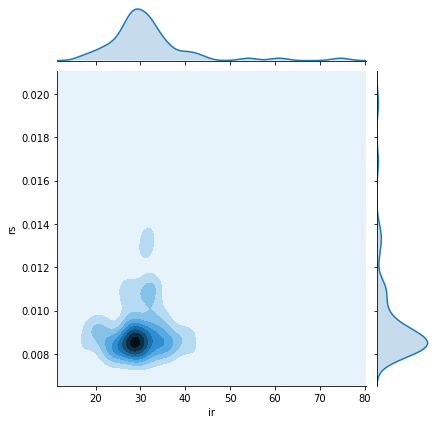

In [89]:
sns.jointplot(x='ir',y='rs',data=fig1_d,kind='kde')

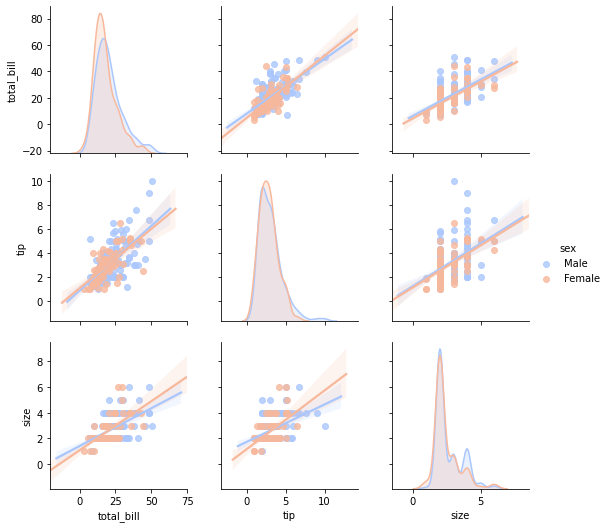

In [96]:
sns.pairplot(tips,hue='sex',palette='coolwarm',kind='reg')

<AxesSubplot:>

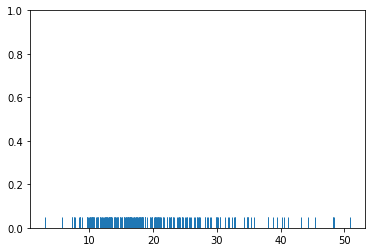

In [97]:
sns.rugplot(tips['total_bill'])

In [ ]:
import numpyas np

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

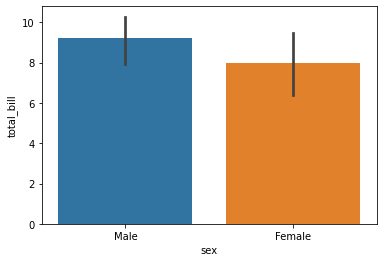

In [102]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

<AxesSubplot:xlabel='state', ylabel='rs'>

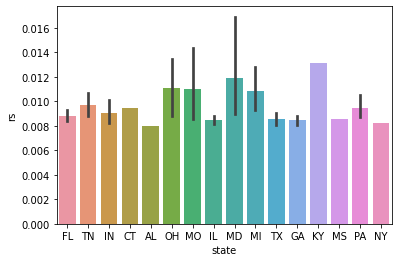

In [101]:
sns.barplot(x='state',y='rs',data=fig1_d)

<AxesSubplot:xlabel='sex', ylabel='count'>

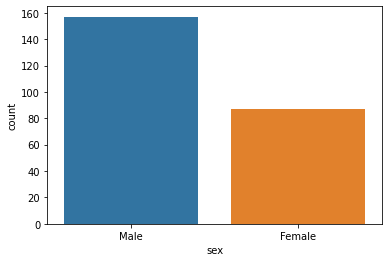

In [103]:
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

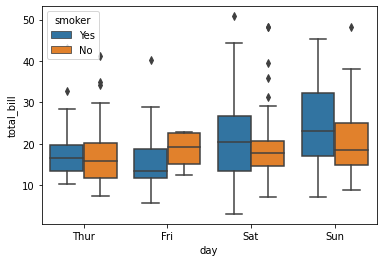

In [107]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

<AxesSubplot:xlabel='state', ylabel='rs'>

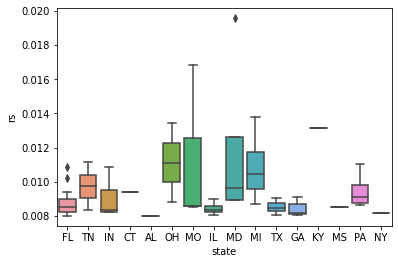

In [106]:
sns.boxplot(x='state',y='rs',data=fig1_d)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

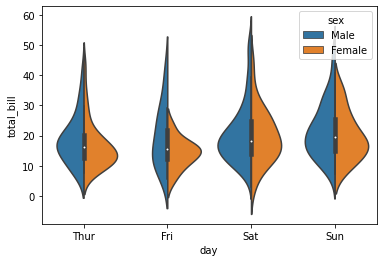

In [110]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

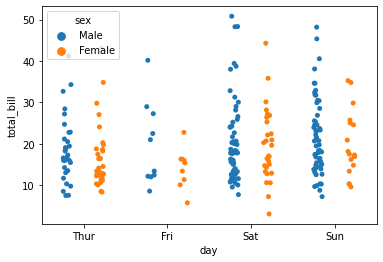

In [117]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',dodge=True)

<Figure size 864x216 with 0 Axes>

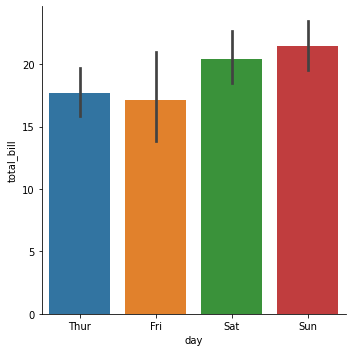

In [124]:
plt.figure(figsize=(12,3))
sns.catplot(x='day',y='total_bill',data=tips,kind='bar')